<h3 style="color:purple">Practicle:4 Logistic Regression</h1>
<h3 style="color:purple">2021BIT023   Vaibhav Lanjewar</h3>


<h2 style="color:brown">Import Libraries</h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv ("diabetes.csv")

In [4]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
df.shape

(768, 9)

In [7]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
print("Attributes of Dataset :",df.columns)

Attributes of Dataset : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
print ("Duplicate values in dataframe are:" , df.duplicated().sum())

Duplicate values in dataframe are: 0


In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Correlation Graph'}>

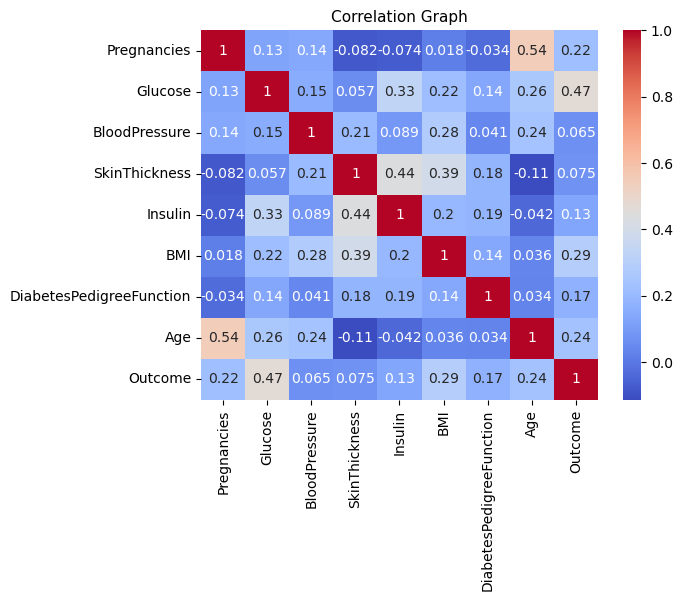

In [22]:
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

<h3 style="color:purple">Logistic Regression</h3>

 X = pd.DataFrame (df , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"])

In [28]:
y = df.Outcome 

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

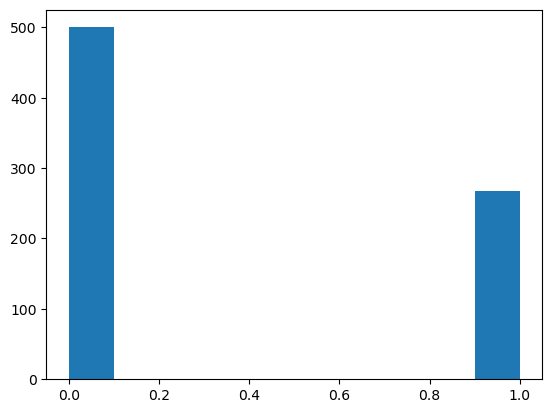

In [30]:
plt.hist (y)


In [43]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.3,train_size=0.7 , random_state = 42)

In [44]:
lr = LogisticRegression (solver = "liblinear")

lr.fit (X_train , y_train)                     
y_pred = lr.predict(X_test)                   
y_predicted_proba = lr.predict_proba(X_test)   

In [72]:
# y_pred

In [37]:
# y_predicted_proba

In [46]:
print ("Accuracy is: " , metrics.accuracy_score (y_test , y_pred))

Accuracy is:  0.7532467532467533


In [48]:
lr.intercept_

array([-5.78012475])

In [49]:
lr.coef_

array([[ 0.06122288,  0.02620407, -0.01664336, -0.00217462, -0.00028294,
         0.06435804,  0.25000045,  0.02213817]])

In [71]:
# lr.predict(X)

In [51]:
lr.score(X,y)

0.7734375

In [52]:
confusion_matrix (y , lr.predict (X))

array([[443,  57],
       [117, 151]], dtype=int64)

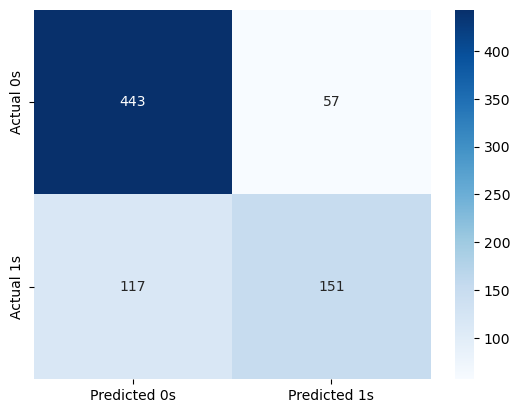

In [54]:
cm = confusion_matrix (y, lr.predict (X))

# Plot the heatmap with labels
sns.heatmap (cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0s", "Predicted 1s"], yticklabels=["Actual 0s", "Actual 1s"])
plt.show ()

In [56]:
print (classification_report (y , lr.predict (X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.77      0.77       768



In [57]:
model = LogisticRegression (solver = "liblinear"  , C = 10.0 , random_state = 0)
model.fit(X,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [61]:
df2 = pd.DataFrame ({"Pregnancies" : [0] , "Glucose" :[80] , "BloodPressure" :[72] ,"SkinThickness" : [0] ,
                    "Insulin" : [0] , "BMI" : [23] , "DiabetesPedigreeFunction" : [0.5] , 
                    "Age" : [30] , "Outcome" : [0]})
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,80,72,0,0,23,0.5,30,0


In [65]:
x_train = df2 [["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]] [:768]
y_train = df2[["Outcome"]][:768].values.reshape (-1,1)

In [66]:
y_train

array([[0]], dtype=int64)